<div style="background-color:#FDFEFE; border-left:5px solid #8E44AD; padding:20px; margin-bottom:20px; border-radius:8px;">

<h2 style="color:#8E44AD; text-align:center;">Library Overview for the Project</h2>

<h3 style="color:#3498DB; margin-top:20px;">Data Scraping and Preprocessing</h3>
<ul style="font-size:16px; font-family: 'Arial', sans-serif; color:#2C3E50;">
  <li><b>pandas</b>: Essential for data manipulation and ingestion.</li>
  <li><b>numpy</b>: Supports efficient numerical computations.</li>
  <li><b>sklearn.preprocessing</b>: For normalizing and encoding data.</li>
</ul>

<h3 style="color:#E74C3C;">Data Wrangling and Feature Extraction</h3>
<ul style="font-size:16px; font-family: 'Arial', sans-serif; color:#2C3E50;">
  <li><b>sklearn.feature_extraction.text</b>: Transforms text data for feature extraction.</li>
  <li><b>sklearn.utils</b>: Utility functions for data wrangling.</li>
  <li><b>collections</b>: Efficient data manipulation during feature extraction.</li>
  <li><b>sklearn.feature_selection</b>: Including <b>SelectKBest</b> and <b>chi2</b> for feature selection.</li>
</ul>

<h3 style="color:#F1C40F;">Model Training, Fine-tuning, and Model Selection</h3>
<ul style="font-size:16px; font-family: 'Arial', sans-serif; color:#2C3E50;">
  <li><b>tensorflow</b>: Core library for deep learning models.</li>
  <li><b>sklearn.model_selection</b>: Data splitting and cross-validation.</li>
  <li><b>tensorflow.keras</b>: Creating and optimizing neural network architectures.</li>
  <li><b>tensorflow.keras.callbacks</b>: For <b>ModelCheckpoint</b>, <b>LearningRateScheduler</b>, and <b>EarlyStopping</b>.</li>
  <li><b>sklearn.linear_model</b>: Includes <b>LinearRegression</b> for model training.</li>
</ul>

<h3 style="color:#2ECC71;">Data Visualization</h3>
<ul style="font-size:16px; font-family: 'Arial', sans-serif; color:#2C3E50;">
  <li><b>matplotlib.pyplot</b>: Wide range of visualizations.</li>
  <li><b>wordcloud</b>: Generating word clouds for textual data analysis.</li>
</ul>

<h3 style="color:#9B59B6;">Evaluation</h3>
<ul style="font-size:16px; font-family: 'Arial', sans-serif; color:#2C3E50;">
  <li><b>sklearn.metrics</b>: Includes evaluation metrics like <b>mean_squared_error</b> for model evaluation.</li>
</ul>

</div>


In [1]:
# !pip install wordcloud -q

In [2]:
### Basic libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import pickle
import warnings
from io import StringIO
warnings.filterwarnings(action='ignore')

# Data Preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import SelectKBest 
from sklearn.feature_selection import chi2

# Model Training
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
import tensorflow as tf

## Import necessary modules for collaborative filtering
from tensorflow.keras.layers import Input, Embedding, Dot, Flatten, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from wordcloud import WordCloud
from collections import defaultdict
from collections import Counter

## Import necessary modules for content-based filtering
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel

#Evaluation 
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MultiLabelBinarizer


<div style="background-color:#ffffff; border-left:10px solid #5499C7; padding:20px; margin-bottom:20px; border-radius:8px;">

<h2 style="color:#5499C7;">Data Loading</h2>

<p style="font-size:14px; font-family: 'Arial', sans-serif; color:#1A5276;">
In this section, we focus on the initial step of our data analysis workflow: loading the dataset. Proper data loading is crucial as it forms the foundation for all subsequent analysis and modeling. We'll be using Python libraries such as <b>pandas</b> for reading and structuring our data efficiently. This step involves loading data from various sources, handling different data formats, and ensuring that the data is correctly imported into our Python environment for further processing and analysis.
</p>

</div>


In [3]:
# Load the dataset
df=pd.read_csv('UserScore.csv', usecols=["user_id","anime_id","rating"])
print("Shape of the Dataset:",df.shape)
df.head()

Shape of the Dataset: (100000, 3)


,user_id,anime_id,rating
0,79182,6372,9
1,329223,87,7
2,475694,3588,9
3,451772,4654,6
4,533993,35076,7


In [4]:
df_anime = pd.read_csv('AnimeInfo.csv')
df_anime.head()

,anime_id,Name,English name,Other name,Score,Genres,Synopsis,Type,Episodes,Aired,...,Studios,Source,Duration,Rating,Rank,Popularity,Favorites,Scored By,Members,Image URL
0,1,Cowboy Bebop,Cowboy Bebop,カウボーイビバップ,8.75,"Action, Award Winning, Sci-Fi","Crime is timeless. By the year 2071, humanity ...",TV,26.0,"Apr 3, 1998 to Apr 24, 1999",...,Sunrise,Original,24 min per ep,R - 17+ (violence & profanity),41.0,43,78525,914193.0,1771505,https://cdn.myanimelist.net/images/anime/4/196...
1,5,Cowboy Bebop: Tengoku no Tobira,Cowboy Bebop: The Movie,カウボーイビバップ 天国の扉,8.38,"Action, Sci-Fi","Another day, another bounty—such is the life o...",Movie,1.0,"Sep 1, 2001",...,Bones,Original,1 hr 55 min,R - 17+ (violence & profanity),189.0,602,1448,206248.0,360978,https://cdn.myanimelist.net/images/anime/1439/...
2,6,Trigun,Trigun,トライガン,8.22,"Action, Adventure, Sci-Fi","Vash the Stampede is the man with a $$60,000,0...",TV,26.0,"Apr 1, 1998 to Sep 30, 1998",...,Madhouse,Manga,24 min per ep,PG-13 - Teens 13 or older,328.0,246,15035,356739.0,727252,https://cdn.myanimelist.net/images/anime/7/203...
3,7,Witch Hunter Robin,Witch Hunter Robin,Witch Hunter ROBIN (ウイッチハンターロビン),7.25,"Action, Drama, Mystery, Supernatural",Robin Sena is a powerful craft user drafted in...,TV,26.0,"Jul 3, 2002 to Dec 25, 2002",...,Sunrise,Original,25 min per ep,PG-13 - Teens 13 or older,2764.0,1795,613,42829.0,111931,https://cdn.myanimelist.net/images/anime/10/19...
4,8,Bouken Ou Beet,Beet the Vandel Buster,冒険王ビィト,6.94,"Adventure, Fantasy, Supernatural",It is the dark century and the people are suff...,TV,52.0,"Sep 30, 2004 to Sep 29, 2005",...,Toei Animation,Manga,23 min per ep,PG - Children,4240.0,5126,14,6413.0,15001,https://cdn.myanimelist.net/images/anime/7/215...


<div style="background-color:#ffffff; border-left:5px solid #CB4335; padding:20px; margin-bottom:20px; border-radius:8px;">

<h2 style="color:#CB4335;">Data Preprocessing</h2>

<p style="font-size:14px; font-family: 'Arial', sans-serif; color:#922B21;">
Data preprocessing is a crucial stage in our data analysis workflow. In this phase, we focus on preparing our dataset for further analysis and modeling. Key steps in this process include cleaning the data, handling missing values, normalizing data scales, and encoding categorical variables. Our aim is to transform raw data into a format that is more suitable for modeling, thereby improving the quality and effectiveness of the insights we can derive from our analysis.
</p>

</div>


In [5]:

info_df = StringIO()
info_df_anime = StringIO()
df.info(buf=info_df)
df_anime.info(buf=info_df_anime)

# Split and print the info side by side
info_lines_df = info_df.getvalue().split('\n')
info_lines_df_anime = info_df_anime.getvalue().split('\n')

for line_df, line_df_anime in zip(info_lines_df, info_lines_df_anime):
    print(f"{line_df:<50} {line_df_anime}")


<class 'pandas.core.frame.DataFrame'>              <class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999             RangeIndex: 24905 entries, 0 to 24904
Data columns (total 3 columns):                    Data columns (total 24 columns):
 #   Column    Non-Null Count   Dtype               #   Column        Non-Null Count  Dtype 
---  ------    --------------   -----              ---  ------        --------------  ----- 
 0   user_id   100000 non-null  int64               0   anime_id      24905 non-null  int64 
 1   anime_id  100000 non-null  int64               1   Name          24905 non-null  object
 2   rating    100000 non-null  int64               2   English name  24905 non-null  object
dtypes: int64(3)                                    3   Other name    24905 non-null  object
memory usage: 2.3 MB                                4   Score         24905 non-null  object
                                                    5   Genres        24905 non-null  o

In [6]:
# Checking if there are any duplicate rows
duplicated_rows = df[df.duplicated()]
print("Duplicated Rows:")
print(duplicated_rows)

Duplicated Rows:
Empty DataFrame
Columns: [user_id, anime_id, rating]
Index: []


In [7]:
# Calculating the average score
avg_score = np.mean(df['rating'])
print('Average Score:', avg_score)

Average Score: 7.62301


In [8]:

scaler = MinMaxScaler(feature_range=(0, 1))

# Scale the 'score' column between 0 and 1
df['scaled_score'] = scaler.fit_transform(df[['rating']])

In [9]:
# Encoding categorical data

user_encoder = LabelEncoder()
df["user_encoded"] = user_encoder.fit_transform(df["user_id"])
num_users = len(user_encoder.classes_)

## Encoding anime IDs
anime_encoder = LabelEncoder()
df["anime_encoded"] = anime_encoder.fit_transform(df["anime_id"])
num_animes = len(anime_encoder.classes_)

# Printing dataset information
print("Number of unique users: {}, Number of unique anime: {}".format(num_users, num_animes))
print("Minimum rating: {}, Maximum rating: {}".format(min(df['rating']), max(df['rating'])))

Number of unique users: 64340, Number of unique anime: 7121
Minimum rating: 1, Maximum rating: 10


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   user_id        100000 non-null  int64  
 1   anime_id       100000 non-null  int64  
 2   rating         100000 non-null  int64  
 3   scaled_score   100000 non-null  float64
 4   user_encoded   100000 non-null  int64  
 5   anime_encoded  100000 non-null  int64  
dtypes: float64(1), int64(5)
memory usage: 4.6 MB


<div style="background-color:#FFFFFF; border-left:5px solid #F39C12; padding:20px; margin-bottom:20px; border-radius:8px;">

<h2 style="color:#F39C12;">Feature Selection</h2>

<ul style="font-size:14px; font-family: 'Arial', sans-serif; color:#B9770E;">
  <li><b>Pivotal Stage:</b> Diligently sift through our datasets to pinpoint the most pertinent features for our predictive models.</li>
  <li><b>Goal:</b> Boost model accuracy, curtail overfitting, and optimize computational efficiency.</li>
  <li><b>Methodology:</b> Deploy the SelectKBest method, incorporating the chi-squared test from the scikit-learn library.</li>
  <li><b>User Ratings DataFrame:</b> Composed predominantly of integer data, navigated using the chi-squared feature selection.</li>
  <li><b>Focus:</b> Unravel key user attributes that substantially influence ratings.</li>
  <li><b>Anime Information DataFrame:</b> Demands a nuanced approach due to its categorical nature.</li>
  <li><b>One-Hot Encoding:</b> Convert categorical elements into a numerical framework, facilitating chi-squared test application.</li>
  <li><b>Key Process:</b> Uncover which aspects of anime data profoundly affect the target metric, such as the score.</li>
  <li><b>Outcome:</b> Lay the groundwork for constructing potent and insightful predictive models, ensuring efficient and effective analysis.</li>
</ul>

</div>


In [11]:
from sklearn.feature_selection import SelectKBest, chi2

# Assuming df_user is your User Ratings DataFrame
X_user = df.drop('rating', axis=1)  # features
y_user = df['rating']               # target variable
X_cat = X_user.astype(int)
# Apply SelectKBest
chi2_selector_user = SelectKBest(chi2, k='all')  # 'all' or specify a number
X_kbest_user = chi2_selector_user.fit_transform(X_cat, y_user)

# Reduced features
print('Original feature number:', X_cat.shape[1])
print('Reduced feature number:', X_kbest_user.shape[1])


Original feature number: 5
Reduced feature number: 5


<Axes: >

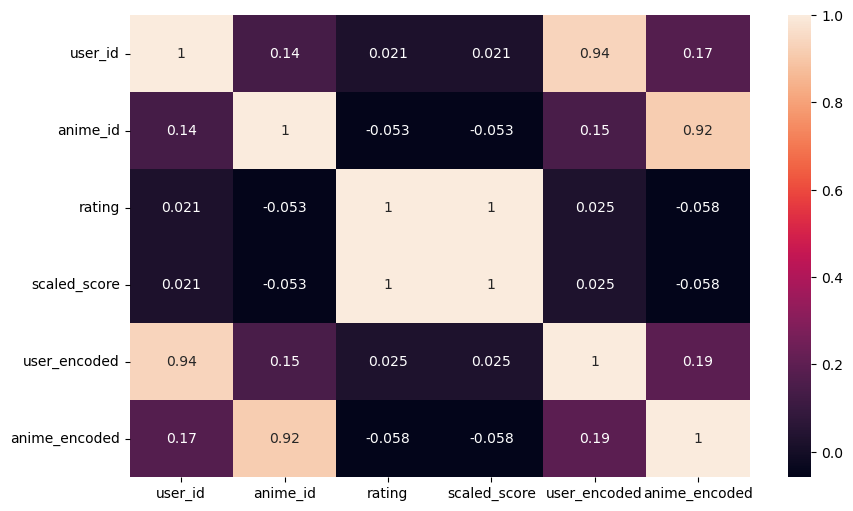

In [12]:

#Correlation matrix
cor = df.corr()
# Plotting Heatmap
plt.figure(figsize = (10,6))
sns.heatmap (cor, annot=True)

<div style="background-color:#FFFFFF; border-left:5px solid #8E44AD; padding:20px; margin-bottom:20px; border-radius:8px;">

<h2 style="color:#8E44AD;">Model Training (Collaborative Filtering)</h2>

<p style="font-size:14px; font-family: 'Arial', sans-serif; color:#6C3483;">
We undertake a meticulous journey in developing a collaborative filtering model, pivotal in the realm of personalized recommendation systems. This detailed process involves several key steps, as outlined in our code:
<ul style="color:#6C3483;">
  <li><b>Data Preparation:</b> Initiating with the shuffling of our dataset using a fixed random state ensures the randomness and reproducibility of our model.</li>
  <li><b>Creating Feature Matrix and Target:</b> We extract the necessary features and target variable, focusing on encoded user and anime IDs as features (<i>X</i>) and scaled scores as the target (<i>y</i>).</li>
  <li><b>Splitting Data:</b> The dataset is divided into training and test sets, balancing between learning and validation to assess the model's generalizability.</li>
  <li><b>Model Architecture - RecommenderNet:</b> Our model architecture, RecommenderNet, is intricately designed with embedding layers for both users and animes. The architecture captures the complex interplay between users and animes through a dot product layer and further processes the information via dense layers, aiming for accurate prediction of user preferences.</li>
  <li><b>Compilation and Optimization:</b> The model is compiled with a binary cross-entropy loss function, and we employ the Adam optimizer. Metrics like Mean Absolute Error (MAE) and Mean Squared Error (MSE) are tracked to evaluate the model's performance.</li>
  <li><b>Advanced Training Techniques:</b> We use a learning rate scheduler to dynamically adjust the learning rate, Model Checkpoint to save the best model iteration, and Early Stopping to prevent overfitting. These techniques collectively contribute to a robust and efficient learning process.</li>
  <li><b>Training Execution:</b> The model undergoes training with specified epochs and batch size, utilizing our array of callbacks to optimize performance and efficiency throughout the learning phase.</li>
  <li><b>Model Evaluation:</b> Post training, the best model weights are reloaded for evaluation, ensuring we utilize the iteration with the most favorable performance.</li>
</ul>
This collaborative filtering approach represents a harmonious blend of strategic data manipulation, sophisticated neural network architecture, and advanced training methodologies, all converging to provide nuanced and personalized user recommendations.
</p>

</div>


In [13]:
# Shuffle the dataset
df = shuffle(df, random_state=100)

# Create feature matrix X and target variable y
X = df[['user_encoded', 'anime_encoded']].values
y = df["scaled_score"].values

# Printing dataset information
print("Shape of X:", X.shape)
print("Shape of y:", y.shape)

Shape of X: (100000, 2)
Shape of y: (100000,)


In [14]:
test_set_size = 10000  # Number of samples to include in the test set

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_set_size, random_state=73)

print("Number of samples in the training set:", len(y_train))
print("Number of samples in the test set:", len(y_test))

Number of samples in the training set: 90000
Number of samples in the test set: 10000


In [15]:
# Prepare input data for model training and evaluation
X_train_array = [X_train[:, 0], X_train[:, 1]]
X_test_array = [X_test[:, 0], X_test[:, 1]]

In [16]:
def RecommenderNet(num_users, num_animes, embedding_size=128):
    user = Input(name='user_encoded', shape=[1])
    user_embedding = Embedding(name='user_embedding', input_dim=num_users, output_dim=embedding_size)(user)

    anime = Input(name='anime_encoded', shape=[1])
    anime_embedding = Embedding(name='anime_embedding', input_dim=num_animes, output_dim=embedding_size)(anime)

    dot_product = Dot(name='dot_product', normalize=True, axes=2)([user_embedding, anime_embedding])
    flattened = Flatten()(dot_product)

    dense = Dense(64, activation='relu')(flattened)
    output = Dense(1, activation='sigmoid')(dense)

    model = Model(inputs=[user, anime], outputs=output)
    model.compile(loss='binary_crossentropy', optimizer=Adam(learning_rate=0.001), metrics=["mae", "mse"])
    
    return model

# Create the model
model = RecommenderNet(num_users, num_animes)

# Printing the model summary
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 user_encoded (InputLayer)      [(None, 1)]          0           []                               
                                                                                                  
 anime_encoded (InputLayer)     [(None, 1)]          0           []                               
                                                                                                  
 user_embedding (Embedding)     (None, 1, 128)       8235520     ['user_encoded[0][0]']           
                                                                                                  
 anime_embedding (Embedding)    (None, 1, 128)       911488      ['anime_encoded[0][0]']          
                                                                                              

In [17]:
from tensorflow.keras.callbacks import ModelCheckpoint, LearningRateScheduler, EarlyStopping

# Define the initial learning rate, minimum learning rate, maximum learning rate, and batch size
start_lr = 0.00001
min_lr = 0.00001
max_lr = 0.00005
batch_size = 10000

# Define the number of epochs for ramp-up, sustain, and exponential decay
rampup_epochs = 5
sustain_epochs = 0
exp_decay = .8

# Learning rate schedule function
def lrfn(epoch):
    if epoch < rampup_epochs:
        return (max_lr - start_lr) / rampup_epochs * epoch + start_lr
    elif epoch < rampup_epochs + sustain_epochs:
        return max_lr
    else:
        return (max_lr - min_lr) * exp_decay**(epoch - rampup_epochs - sustain_epochs) + min_lr

# Learning rate scheduler callback
lr_callback = LearningRateScheduler(lambda epoch: lrfn(epoch), verbose=0)

# File path for saving the model weights
checkpoint_filepath = 'myanimeweights.h5'

# Model checkpoint callback to save the best weights
model_checkpoints = ModelCheckpoint(filepath=checkpoint_filepath,
                                    save_weights_only=True,
                                    monitor='val_loss',
                                    mode='min',
                                    save_best_only=True)

# Early stopping callback to prevent overfitting
early_stopping = EarlyStopping(patience=3, monitor='val_loss', mode='min', restore_best_weights=True)

# Define the list of callbacks
my_callbacks = [
    model_checkpoints,
    lr_callback,
    early_stopping
]


In [18]:
# Model training
history = model.fit(
    x=X_train_array,
    y=y_train,
    batch_size=batch_size,
    epochs=60,
    verbose=1,
    validation_data=(X_test_array, y_test),
    callbacks=my_callbacks
)

model.load_weights(checkpoint_filepath)

Epoch 1/60
9/9 [==============================] - 4s 218ms/step - loss: 0.6909 - mae: 0.2615 - mse: 0.0886 - val_loss: 0.6908 - val_mae: 0.2632 - val_mse: 0.0898 - lr: 1.0000e-05
Epoch 2/60
9/9 [==============================] - 1s 144ms/step - loss: 0.6907 - mae: 0.2613 - mse: 0.0885 - val_loss: 0.6905 - val_mae: 0.2629 - val_mse: 0.0896 - lr: 1.8000e-05
Epoch 3/60
9/9 [==============================] - 1s 141ms/step - loss: 0.6904 - mae: 0.2610 - mse: 0.0884 - val_loss: 0.6902 - val_mae: 0.2627 - val_mse: 0.0895 - lr: 2.6000e-05
Epoch 4/60
9/9 [==============================] - 1s 147ms/step - loss: 0.6899 - mae: 0.2606 - mse: 0.0881 - val_loss: 0.6897 - val_mae: 0.2623 - val_mse: 0.0893 - lr: 3.4000e-05
Epoch 5/60
9/9 [==============================] - 1s 159ms/step - loss: 0.6894 - mae: 0.2602 - mse: 0.0879 - val_loss: 0.6892 - val_mae: 0.2618 - val_mse: 0.0890 - lr: 4.2000e-05
Epoch 6/60
9/9 [==============================] - 1s 151ms/step - loss: 0.6887 - mae: 0.2596 - mse: 0.087

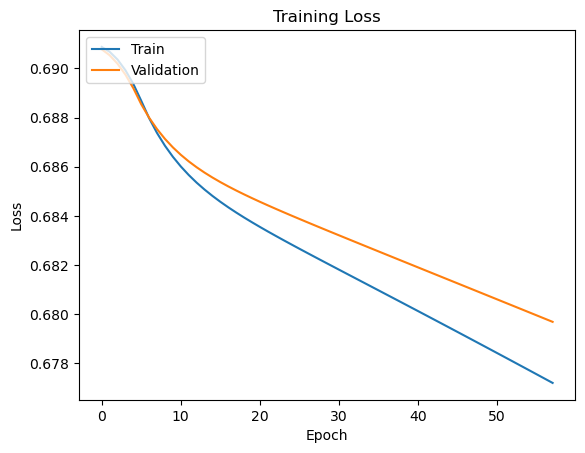

In [19]:
# Training results visualization

plt.plot(history.history["loss"][0:-2])
plt.plot(history.history["val_loss"][0:-2])
plt.title("Training Loss")
plt.ylabel("Loss")
plt.xlabel("Epoch")
plt.legend(["Train", "Validation"], loc="upper left")
plt.show()

<div style="background-color:#FFFFFF; border-left:5px solid #28B463; padding:20px; margin-bottom:20px; border-radius:8px;">

<h2 style="color:#28B463;">Recommendation Process</h2>

<p style="font-size:14px; font-family: 'Arial', sans-serif; color:#1D8348;">
In the realm of our collaborative filtering model, we embark on a sophisticated journey to fine-tune anime recommendations for our users. The process, outlined in our model, encapsulates several essential steps to ensure precision and relevance:
<ul style="color:#1D8348;">
  <li><b>Extraction of Embeddings:</b> The foundation is laid by extracting and normalizing embeddings from our model. These embeddings, representing users and animes, are essential for understanding user preferences and anime characteristics.</li>
  <li><b>Popularity Threshold Implementation:</b> A crucial aspect of our approach is the introduction of a popularity threshold. <i>"Now I want my model to recommend only those animes that have been rated by at least a certain number of users, which I will set as the threshold. This threshold helps ensure that the recommended anime titles have received a sufficient number of ratings, indicating a certain level of popularity or user engagement."</i> This step ensures that our recommendations are not only personalized but also resonate with wider audience preferences.</li>
  <li><b>Filtering for Quality Assurance:</b> Applying the threshold, we refine our anime dataset, retaining only those titles that meet this popularity criterion. This approach ensures a balance between individualized recommendations and broader appeal.</li>
</ul>
This methodical and data-driven process aims to deliver recommendations that are not just tailored to individual users but also reflect titles with significant engagement, thereby enhancing the overall recommendation quality.
</p>

</div>


In [20]:
def extract_weights(name, model):
    # Get the layer by name from the model
    weight_layer = model.get_layer(name)
    
    # Get the weights from the layer
    weights = weight_layer.get_weights()[0]
    
    # Normalize the weights
    weights = weights / np.linalg.norm(weights, axis=1).reshape((-1, 1))
    
    return weights

# Extract weights for anime embeddings
anime_weights = extract_weights('anime_embedding', model)
# Extract weights for user embeddings
user_weights = extract_weights('user_embedding', model)

In [21]:
popularity_threshold = 50
df_anime= df_anime.query('Members >= @popularity_threshold')
print(df_anime.shape)
df_anime.head(3)      # only give rating of those movies for which atleast 200 user have rated

(22879, 24)


,anime_id,Name,English name,Other name,Score,Genres,Synopsis,Type,Episodes,Aired,...,Studios,Source,Duration,Rating,Rank,Popularity,Favorites,Scored By,Members,Image URL
0,1,Cowboy Bebop,Cowboy Bebop,カウボーイビバップ,8.75,"Action, Award Winning, Sci-Fi","Crime is timeless. By the year 2071, humanity ...",TV,26.0,"Apr 3, 1998 to Apr 24, 1999",...,Sunrise,Original,24 min per ep,R - 17+ (violence & profanity),41.0,43,78525,914193.0,1771505,https://cdn.myanimelist.net/images/anime/4/196...
1,5,Cowboy Bebop: Tengoku no Tobira,Cowboy Bebop: The Movie,カウボーイビバップ 天国の扉,8.38,"Action, Sci-Fi","Another day, another bounty—such is the life o...",Movie,1.0,"Sep 1, 2001",...,Bones,Original,1 hr 55 min,R - 17+ (violence & profanity),189.0,602,1448,206248.0,360978,https://cdn.myanimelist.net/images/anime/1439/...
2,6,Trigun,Trigun,トライガン,8.22,"Action, Adventure, Sci-Fi","Vash the Stampede is the man with a $$60,000,0...",TV,26.0,"Apr 1, 1998 to Sep 30, 1998",...,Madhouse,Manga,24 min per ep,PG-13 - Teens 13 or older,328.0,246,15035,356739.0,727252,https://cdn.myanimelist.net/images/anime/7/203...


<div style="background-color:#E8F8F5; border-left:5px solid #17A589; padding:20px; margin-bottom:20px; border-radius:8px;">

<h2 style="color:#17A589;">1: Item Based Recommendation</h2>

<p style="font-size:14px; font-family: 'Arial', sans-serif; color:#148F77;">
The Item-Based Recommendation module of our system is designed to find animes similar to a given title. This functionality, encapsulated in the <code>find_similar_animes</code> function, follows a precise and user-centric approach:
<ul style="color:#148F77;">
  <li><b>Anime Identification:</b> The function begins by identifying the anime within our dataset, extracting its unique ID based on the provided name.</li>
  <li><b>Similarity Computation:</b> Using the pre-trained anime embeddings, it calculates similarity scores with all other animes, leveraging the dot product of their embeddings.</li>
  <li><b>Ranking Similar Animes:</b> Animes are sorted according to their similarity scores. The function can return either the most or least similar animes, governed by the 'neg' parameter.</li>
  <li><b>Detail Extraction:</b> For each similar anime, it compiles essential details such as the name, similarity score, genre, and synopsis, presenting a well-rounded perspective of the recommendations.</li>
  <li><b>Edge Case Management:</b> In scenarios where the given anime name is not found, the function responsibly notifies the user, ensuring clarity and trustworthiness.</li>
</ul>
By employing this method, we provide viewers with recommendations closely aligned with their preferences, rooted in the similarities of individual titles, thereby enriching the user experience with personalized content.
</p>

</div>


In [22]:
def find_similar_animes(name, n=10, return_dist=False, neg=False):
    try:
        anime_row = df_anime[df_anime['Name'] == name].iloc[0]
        index = anime_row['anime_id']
        encoded_index = anime_encoder.transform([index])[0]
        weights = anime_weights
        dists = np.dot(weights, weights[encoded_index])
        sorted_dists = np.argsort(dists)
        n = n + 1            
        if neg:
            closest = sorted_dists[:n]
        else:
            closest = sorted_dists[-n:]
        print('Animes closest to {}'.format(name))
        if return_dist:
            return dists, closest
        
        SimilarityArr = []
        
        for close in closest:
            decoded_id = anime_encoder.inverse_transform([close])[0]
            anime_frame = df_anime[df_anime['anime_id'] == decoded_id]
            
            anime_name = anime_frame['Name'].values[0]
            english_name = anime_frame['English name'].values[0]
            name = english_name if english_name != "UNKNOWN" else anime_name
            genre = anime_frame['Genres'].values[0]
            Synopsis = anime_frame['Synopsis'].values[0]
            similarity = dists[close]
            similarity = "{:.2f}%".format(similarity * 100)
            SimilarityArr.append({"Name": name, "Similarity": similarity, "Genres": genre, "Synopsis":Synopsis})
        Frame = pd.DataFrame(SimilarityArr).sort_values(by="Similarity", ascending=False)
        return Frame[Frame.Name != name]
    except:
        print('{} not found in Anime list'.format(name))

pd.set_option('display.max_colwidth', None)

In [23]:
find_similar_animes('Tensei shitara Slime Datta Ken', n=5, neg=False)  # That Time I Got Reincarnated as a Slime

Animes closest to Tensei shitara Slime Datta Ken


,Name,Similarity,Genres,Synopsis
4,Love Stage!!,34.39%,"Boys Love, Comedy, Romance","With an actress mother, producer father, and rockstar brother, anyone would expect Izumi Sena to eventually enter showbiz himself. However, aside from a commercial for a wedding magazine when he was a child, Izumi has never been in the spotlight; instead, he aims to become a manga artist. \n\nBut a decade after the shoot, the magazine calls for a 10th anniversary ad, requesting the original child actors for the project. This reunites Izumi with Ryouma Ichijou, now a popular actor who, much to Izumi's shock, has been in love with him ever since their first meeting! However, due to Izumi's feminine appearance and unisex name, Ryouma believed the boy was a girl and continues to do so to this day. Izumi's troubles are just beginning, because even after discovering the truth, Ryouma can't seem to shake off his feelings..."
3,Miss Kobayashi's Dragon Maid S,34.13%,"Fantasy, Slice of Life","As Tooru continues on her quest to become the greatest maid and Kanna Kamui fully immerses in her life as an elementary school student, there is not a dull day in the Kobayashi household with mischief being a daily staple. On one such day, however, a massive landslide is spotted on the hill where Kobayashi and Tooru first met—a clear display of a dragon's might. When none of the dragons they know claim responsibility, the perpetrator herself descends from the skies: Ilulu, the radical Chaos Dragon with monstrous power rivaling that of Tooru.\n\nSickened by Tooru's involvement with humans, Ilulu resorts to the typical dragon method of resolving conflict—a battle to the death. Despite such behavior, she becomes intrigued by Kobayashi's ability to befriend dragons and decides instead to observe just what makes Kobayashi so special. With a new troublesome dragon in town, Kobayashi's eccentric life with a dragon maid is only getting merrier."
2,Mobile Suit Gundam: The 08th MS Team - Miller's Report,32.17%,"Drama, Romance, Sci-Fi","Shortly after being rescued off the Himalayas, Federation Ensign Shiro Amada is accused of espionage due to his encounter with Zeon's top-secret mobile armor. Intelligence officer Alice Miller is assigned to investigate on Shiro's whereabouts during his disappearance. Her documented findings will determine whether or not Shiro is a traitor, and what his fate will be as commander of the 08th MS Team.\n\n(Source: ANN)"
1,Crying Freeman,30.35%,"Action, Drama, Romance","Yo Hinomura was an ordinary Japanese potter when a run-in with a Chinese mafia changed his life forever. Now an assassin for the 108 Dragons, Yo is the perfect killing machine. As a sign for remorse over his victims, he sheds tears after eliminating his targets. Because of this, he is infamously known by the Dragons and every crime syndicate in the world as ""Crying Freeman.""\n\n(Source: ANN)"
0,The Life of Budori Gusuko,29.40%,"Award Winning, Drama, Fantasy, Slice of Life","The fairy tale follows a young man named Budori Gusuko in the Tohoku forests of northeastern Japan in the 1920s. After an onslaught of droughts and natural disasters, Budori is forced to leave his home and search for a better life elsewhere. Budori joins a group of scientists at the Ihatov Volcano Department, which deals with the same natural disasters that drove Budori from his home.\n\n(Source: ANN)"


In [24]:
find_similar_animes('Shigatsu wa Kimi no Uso', n=5, neg=False) # Your Lie in April

Animes closest to Shigatsu wa Kimi no Uso


,Name,Similarity,Genres,Synopsis
4,∀ Gundam,36.17%,"Action, Adventure, Award Winning, Drama, Romance, Sci-Fi","It is the Correct Century, two millennia after a devastating conflict which left the world broken. Earth is now mostly uninhabitable, and thus a remnant of humanity has resided on the Moon while the Earth and its few survivors recover. For years, the ""Moonrace,"" the people of the Moon, have continued to check if Earth is fit for resettlement.\n\nA boy named Rolan Cehack and two others are sent down to Earth for a reconnaissance mission. Rolan ends up spending a year on the planet working for the Heim Family, aristocrats living in a Victorian-like society. This family, like others of similar wealthy status, celebrates one's coming of age with a ceremony involving a giant stone statue known as the ""White Doll.""\n\nTo Rolan's surprise, the Moonrace suddenly touches down on Earth with the intent of taking it by force. During the attack, the White Doll is broken apart, revealing a mobile suit called the ""Turn A Gundam"" inside. With Rolan in its cockpit, the Turn A causes a standoff between the forces of Earth and Moon. The young pilot, along with the people of both sides, must keep the peace and avoid another all-out, catastrophic war."
3,Detective Conan Magic File 2: Kudou Shinichi - The Case of the Mysterious Wall and the Black Lab,30.74%,"Adventure, Comedy, Mystery","Magic File 2 was sold at select retailers (7-11 branded equivalents) in Japan, along with PPV episodes of the show (episodes released long before, such as the NY case). The first disc housed the Movie 12 Side-Story OVA, which features Kudou Shinichi and details a bit of the backstory from the upcoming movie. The second disc was the one with the PPV episodes.\n\n(Source: DCTP Forum)"
2,Food Wars! The Fifth Plate,28.79%,"Gourmet, Ecchi","Thanks to Souma Yukihira, Erina Nakiri, and the rebel forces overthrowing the regime of Azami Nakiri—the previous school director—and the former Elite Ten, Tootsuki Culinary Academy is back in order. However, its students have one more great battle ahead of them: the BLUE, a competition where young chefs seeking world-class fame compete. Faced with new trials and rivals, Souma and his friends will fight to conquer the BLUE and to defeat Asahi Saiba, the leader of an underworld organization of chefs known as Noir, who once defeated Souma and his father in a Shokugeki."
1,Koiito Kinenbi The Animation,27.47%,Hentai,Based on the manga by TakayaKi.\n\nA collection of short but sweet romantic stories with happy endings.
0,Ani*Kuri15,26.80%,"Adventure, Comedy, Drama, Fantasy, Sci-Fi, Slice of Life, Supernatural","15 one-minute shorts created by various people from Japan's animation industry. The title of the collection, Ani*Kuri15, is abbreviated from the words ""anime"" and ""creators"".\n\nSeason One\nShinji Kimura (Studio 4°C; Art Director, Steamboy) - title: Attack of Higashimachi Ni Chome/Attack of Higashimachi 2nd Burough\nShōjirō Nishimi (Studio 4°C; Character Designer, Tekkonkinkreet) - Uchujin Raikou Hiroshi no Baai/Invasion from Space - Hiroshi's Case\nAkemi Hayashi (Gainax; Character Designer, Fruits Basket) - Namida no Mukou/From the Other Side of the Tears\nOsamu Kobayashi (Madhouse; Art/Mecha Desgin, Gungrave) - Sancha Blues/The Aromatic Tea Blues\nYasufumi Soejima (Gonzo; 3D/CG Director, Last Exile) - Hyotoko/Blaze Man\n\nSeason Two\nAtsushi Takeuchi (Production I.G; Mecha Design, Ghost in the Shell)\nMamoru Oshii (Production I.G; Director, Ghost in the Shell) - Project Mermaid\nKazuto Nakazawa (Studio 4°C; First Unit Director, Kill Bill Chapter 3: The Origin of O-Ren from Kill Bill: Volume 1) - ""yurururu"" ~Nichijou Hen~\nRanji Murata (Gonzo; Character Design, Blue Submarine No. 6) and Tatsuya Yabuta (Gonzo; Story Design, Final Fantasy VII) - Gyrosopter\nTobira Oda (Original Manga, Danchi Tomō) and Yasuyuki Shimizu (Key Animation, Naruto (movies)) (Studio 4°C)\n\nSeason Three\nMichael Arias (Studio 4°C; Direct

In [25]:
find_similar_animes('One Punch Man', n=5, neg=False)

Animes closest to One Punch Man


,Name,Similarity,Genres,Synopsis
4,Humanity Has Declined,30.21%,"Adventure, Comedy, Fantasy","Because of the constantly declining birth rates over many decades, human civilization is all but extinct. With only a few humans remaining, they survive in this post-apocalyptic world with what was left behind by the previous generations. Earth is now dominated by fairies, tiny creatures with extremely advanced technology, an obsession with candy, and a complete disregard for human safety. \n\nA young girl who has just finished her studies returns to her hometown and is designated as an official United Nations arbitrator. Her duty is to serve as a link between mankind and fairies, reassuring each side that both races can live together peacefully. She imagines this task will be easy enough, but controlling the disasters created by the oblivious fairies in their pursuit of candy will require a lot more effort than she initially believes."
3,Starry☆Sky,30.18%,UNKNOWN,"Formerly an all-boys school, Seigetsu Academy is now a co-ed institution that hones its students' knowledge in astronomy. In this regard, Tsukiko Yahisa enrolls as the first and only female student in the academy. By her side are her childhood best friends, Kanata Nanami and Suzuya Touzuki, who shield her from the advances of the student body. As Tsukiko learns to navigate her new environment, she encounters 13 distinct boys who are based on the Western zodiac star signs. Eventually, Tsukiko's involvement with these boys drags her deeper into star-crossed routes that will entangle her in numerous affairs."
2,Dragon Age: Dawn of the Seeker,28.63%,"Action, Fantasy","In a time of darkness and barbarism, the Chantry has arisen - a religious order seeking to bring stability to a world corrupted by sinister magic. Led by the Divine, the Chantry's Templar warriors ruthlessly restrain the Mages and their magical cabals. But when the Templars fail, the most elite order of the Chantry takes charge - the Seekers!\n\n(Source: AniDB)"
1,Prison School: Mad Wax,28.10%,"Comedy, Romance, Ecchi","Hachimitsu Private Academy's five male students have been released from their oppressive prison captors, allowing them to return to their ideal school lives surrounded by short-skirted girls.\n\nWith their freedom restored, things could not be going better for the gang. Kiyoshi Fujino and Shingo Wakamoto have formed close bonds with their female classmates; Reiji Andou is the center of attention due to his masochistic quirks; and even Takehito ""Gakuto"" Morokuzu—notorious for defecating himself during class—befriends the klutzy yet like-minded Mitsuko Yokoyama. \n\nHowever, in contrast to his fellow ex-convicts, Jouji ""Joe"" Nezu struggles to readjust to student life, and the unlikely romantic success of his friend Gakuto pushes him to his wit's end. Feeling ostracized, he begins to wonder if life was better behind bars."
0,Bloods: Inraku no Ketsuzoku 2,27.71%,Hentai,"The Sagimiya family is cursed in that its members are sexually aroused in the presence of another of the same bloodline. Sagimiya Misaki and her elder twin, Shun, are both disgusted over this and have sworn to resist the calling of their blood. However, Shun loses his composure and goes to their elder sister, Kagu, for release. After Misaki finds out, she too loses her resolve and seeks out Shun.\n\n(Source: ANN)"


In [26]:
find_similar_animes('Mushoku Tensei: Isekai Ittara Honki Dasu', n=5, neg=False)

Animes closest to Mushoku Tensei: Isekai Ittara Honki Dasu


,Name,Similarity,Genres,Synopsis
4,Lupin III: Harimao no Zaihou wo Oe!!,30.72%,"Action, Adventure, Comedy, Mystery","Lupin's on the trail of a decades-lost treasure—the collected booty of World-War-II-era thief Harimao—worth billions of dollars. But as he plans to con retired British spy Sir Archer into giving up the location of the stash, Archer himself gets into the hunt. Lupin now has to team up with his former mark to outwit a more sinister opponent who wants the treasure for himself. And of course, Zenigata's on the scent and gunning for the gang once again.\n\n(Source: ANN)"
3,Arad Senki: Slap Up Party,28.99%,"Action, Adventure, Comedy, Fantasy","The anime will follow the adventures of Baron, a man living on continent of Arad in the year 981 after ""the cursed light of Kazan"" has fallen across the land. Thanks to the curse, one of his arms has become possessed. After finding a sword that has been possessed by the spirit Roxy, he embarks on a quest to unravel the secret of the curse and meets various people who also join his party.\n\n(Source: ANN)"
2,Ganbare Genki,28.45%,"Action, Comedy, Sports","Horiguchi Genki was 5 years old boy. His mother died when he was born, and he was raised only by his father. His father, Shark Horiguchi, was a professional boxer, but he was ruined and become an itinerant boxer. However, Genki believed his father was strong and he would become a champion, and he had a dream to become a strong boxer as his father. \nAfter his father’s death, he was adopted by his grandparents. Although they opposed Genki boxing, Genki made up his mind to become a boxer, and he continued training secretly. Meeting with various people, for example, Teacher Ashikiwa who resembles his mother, Mishima who is a high school boxing champion, he made his way to be a boxer. \n\n(Source: AnimeNfo)"
1,Black Bullet,28.27%,"Action, Mystery, Sci-Fi","In the year 2021, a parasitic virus known as ""Gastrea"" infects humans and turns them into monsters. What is left of mankind now lives within the Monolith walls, walls that are made of Varanium, the only material that can hurt Gastrea.\n\nTo counter the threat that the Gastrea pose, ""Cursed Children""—female children whose bodies contain trace amounts of the virus which grant them superhuman abilities—officially called Initiators by the Tendo Civil Security, are given partners called Promoters, people who work to guide and protect the young Initiators. These teams of two are sent out on missions to fight the monsters created by the Gastrea virus and keep them at bay. \n\nBlack Bullet revolves around the team of Enju Aihara, an Initiator, and Satomi Rentaro, a Promoter, as they go on missions to fight the growing threat of Gastrea in their hometown of Tokyo."
0,The Silver Guardian,27.38%,"Adventure, Fantasy","High school student and gamer Suigin Riku attends the prestigious Shinryou Private Academy, a school for the elite and the children of the wealthy. But rich or wealthy are not words that describe Suigin; in fact, he is dirt poor and must work many part time jobs to pay for his tuition. During one such job, he dives into a pool to save his pet cat, fully aware that he cannot swim. Luckily, he is saved by Rei Riku, the beautiful and popular daughter of a game developer, and he falls in love with her.\n\nHe is also drawn to another girl: a new friend he meets in Dungeon Century, his favorite online RPG. But when the game is scheduled to shut down, he knows his adventures with her will soon end. However, the day after the game is shut down, he finds out that Rei and the online girl are one and the same. Soon after, Rei gives Suigin a new game meant to replace Dungeon Century—a tomb raiding game called Grave Buster. But when Rei is suddenly kidnapped, Suigin is pulled inside Grave Buster to save her.\n\nGin no Guardian follows Suigin as he plays through Grave Buster to save Rei, while uncovering the secrets hidden within the game."


<div style="background-color:#FFFFFF; border-left:15px solid #AF7AC5; padding:20px; margin-bottom:20px; border-radius:8px;">

<h2 style="color:#AF7AC5;">2: User Based Recommendation</h2>

<p style="font-size:14px; font-family: 'Arial', sans-serif; color:#7D3C98;">
Our User-Based Recommendation system focuses on finding users with similar anime preferences and making recommendations based on these similarities. The process is divided into the following parts:

<h3 style="color:#AF7AC5;">Part 1: Finding Similar Users</h3>
<p style="color:#7D3C98;">
In this initial phase, we aim to identify users whose anime preferences align closely with a given user. The process involves:
<ul>
  <li>Selecting a random user from our dataset, especially those with fewer than 500 ratings to ensure a diverse selection.</li>
  <li>Utilizing the <code>find_similar_users</code> function, which calculates the similarity between users based on their anime interactions. This function employs a weighted matrix to determine similarity, considering factors such as the number of similar animes watched.</li>
  <li>The function returns a DataFrame listing users most similar to the chosen user, ranked by their similarity scores.</li>
  <li>Additional filters are applied to refine the selection, ensuring that the similarities are significant (e.g., above a certain threshold) and that the similar users are distinct from the input user.</li>
</ul>
Through this approach, we can identify users with similar viewing patterns and preferences, forming the basis for the next steps in the recommendation process.
</p>

</div>


In [27]:
def find_similar_users(item_input, n=10, return_dist=False, neg=False):
    try:
        index = item_input
        encoded_index = user_encoder.transform([index])[0]
        weights = user_weights
        dists = np.dot(weights, weights[encoded_index])
        sorted_dists = np.argsort(dists)
        n = n + 1
        
        if neg:
            closest = sorted_dists[:n]
        else:
            closest = sorted_dists[-n:]
            
        SimilarityArr = []
        
        for close in closest:
            similarity = dists[close]
            if isinstance(item_input, int):
                decoded_id = user_encoder.inverse_transform([close])[0]
                SimilarityArr.append({"similar_users": decoded_id, "similarity": similarity})
        Frame = pd.DataFrame(SimilarityArr).sort_values(by="similarity", ascending=False)
        return Frame
    except:
        print('\033[1m{}\033[0m, Not Found in User list'.format(item_input))

In [28]:
# Select a random user
ratings_per_user = df.groupby('user_id').size()
random_user = int(ratings_per_user[ratings_per_user < 500].sample(1, random_state=None).index[0])

# Find similar users to the random user
similar_users = find_similar_users(random_user, n=10, neg=False)
similar_users = similar_users[similar_users.similarity > 0.4]
similar_users = similar_users[similar_users.similar_users != random_user]
similar_users

,similar_users,similarity
9,89346,0.400286


<div style="background-color:#FFFFFF; border-left:15px solid #F5B041; padding:20px; margin-bottom:20px; border-radius:8px;">

<h2 style="color:#F5B041;">Part 2: User Preferences</h2>

<p style="font-size:14px; font-family: 'Arial', sans-serif; color:#D35400;">
In this segment of our User-Based Recommendation system, we delve into the specific preferences of individual users. The focus is on understanding the types of animes a user favors, particularly in terms of genres. This is accomplished through the following steps:
<ul style="color:#D35400;">
  <li><b>Function - get_user_preferences:</b> This function takes a user ID as input and identifies the animes watched by this user, focusing particularly on those with high ratings. It helps in discerning the user's preferred anime titles and the genres they are inclined towards.</li>
  <li><b>Top Rated Animes:</b> The function filters the animes watched by the user based on their ratings, particularly selecting those in the higher percentile (indicative of preference).</li>
  <li><b>Genre Analysis:</b> A crucial aspect of understanding user preferences is analyzing the genres of these top-rated animes. This analysis gives insights into the types of content that resonate most with the user.</li>
  <li><b>Visualizing Preferences:</b> Optionally, the function provides a way to visualize these preferences through a word cloud, offering a graphic representation of the most favored genres. The <code>showWordCloud</code> function generates this visualization, enhancing the interpretability of the user's preferences.</li>
</ul>
By executing this process, we gain a nuanced understanding of what a user enjoys, allowing for more personalized and targeted anime recommendations based on their specific likes and viewing history.
</p>

</div>


In [29]:
# Function to display a word cloud of preferred genres
def showWordCloud(all_genres):
    genres_cloud = WordCloud(width=700, height=400, background_color='white', colormap='gnuplot').generate_from_frequencies(all_genres)
    plt.figure(figsize=(10, 8))
    plt.imshow(genres_cloud, interpolation='bilinear')
    plt.axis('off')
    plt.show()

def get_user_preferences(user_id, plot=False, verbose=0):
    animes_watched_by_user = df[df['user_id'] == user_id]
    
    if animes_watched_by_user.empty:
        print("User #{} has not watched any animes.".format(user_id))
        return pd.DataFrame()
    
    user_rating_percentile = np.percentile(animes_watched_by_user.rating, 75)
    animes_watched_by_user = animes_watched_by_user[animes_watched_by_user.rating >= user_rating_percentile]
    top_animes_user = (
        animes_watched_by_user.sort_values(by="rating", ascending=False)
        .anime_id.values
    )
    
    anime_df_rows = df_anime[df_anime["anime_id"].isin(top_animes_user)]
    anime_df_rows = anime_df_rows[["Name", "Genres"]]
    
    if verbose != 0:
        print("User \033[1m{}\033[0m has watched {} anime(s) with an average rating of {:.1f}/10\n".format(
            user_id, len(animes_watched_by_user), animes_watched_by_user['rating'].mean()
        ))
        print('\033[1m----- Preferred genres----- \033[0m\n')

    if plot:
        genres_list = []
        for genres in anime_df_rows['Genres']:
            if isinstance(genres, str):
                for genre in genres.split(','):
                    genres_list.append(genre.strip())

        showWordCloud(dict(Counter(genres_list)))
    
    return anime_df_rows

User 28511 has watched 1 anime(s) with an average rating of 6.0/10

----- Preferred genres----- 



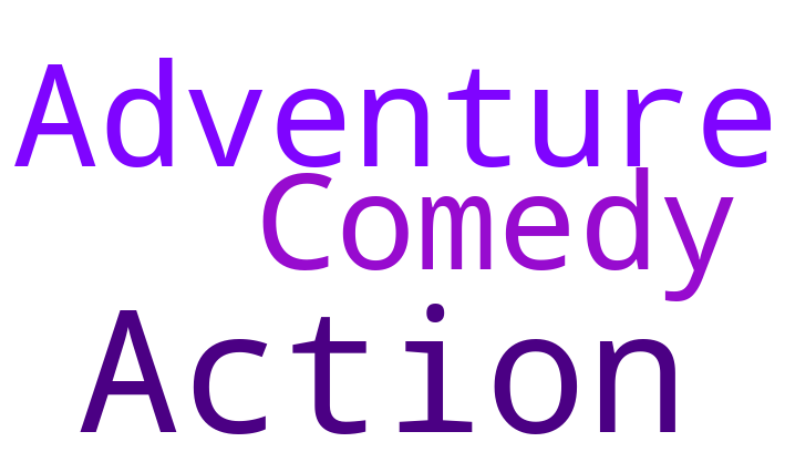

,Name,Genres
182,Samurai Champloo,"Action, Adventure, Comedy"


In [30]:
# Get user preferences for the random user
user_pref = get_user_preferences(random_user, plot=True, verbose=1)
pd.DataFrame(user_pref).head(5)

<div style="background-color:#FFFFFF; border-left:15px solid #5D6D7E; padding:20px; margin-bottom:20px; border-radius:8px;">

<h2 style="color:#5D6D7E;">Part 3: Recommending Animes for a User</h2>

<p style="font-size:14px; font-family: 'Arial', sans-serif; color:#34495E;">
The final stage of our User-Based Recommendation system focuses on generating personalized anime recommendations for a specific user. This process leverages the preferences of users similar to the target user, following these key steps:
<ul style="color:#34495E;">
  <li><b>Function - get_recommended_animes:</b> This function plays a pivotal role. It iterates through the list of users similar to the selected user and extracts their anime preferences.</li>
  <li><b>Identifying Unique Recommendations:</b> The function then compares these preferences against the animes already watched by the selected user. It identifies animes favored by similar users but not yet watched by the target user, avoiding redundant recommendations.</li>
  <li><b>Generating Recommendations:</b> Based on this comparison, a list of recommended animes is generated. This list includes the anime titles along with their genres and a brief synopsis, offering a comprehensive view of each recommendation.</li>
  <li><b>Output:</b> The final output is a DataFrame containing these recommendations, tailored to match the user's preferences as closely as possible, based on the viewing patterns of similar users.</li>
</ul>
By applying this method, we ensure that the recommended animes resonate with the user's taste, reflecting not only their preferences but also introducing them to new titles that similar users have appreciated.
</p>

</div>


In [31]:
def get_recommended_animes(similar_users, user_pref, n=10):
    recommended_animes = []
    anime_list = []
    
    for user_id in similar_users.similar_users.values:
        pref_list = get_user_preferences(int(user_id))
        if not pref_list.empty:  # Check if user has watched any animes
            pref_list = pref_list[~pref_list["Name"].isin(user_pref["Name"].values)]
            anime_list.append(pref_list.Name.values)
            
    if len(anime_list) == 0:
        print("No anime recommendations available for the given users.")
        return pd.DataFrame()
    
    anime_list = pd.DataFrame(anime_list)
    sorted_list = pd.DataFrame(pd.Series(anime_list.values.ravel()).value_counts()).head(n)
    # Count the occurrences of each anime in the entire dataset
    anime_count = df['anime_id'].value_counts()
    
    for i, anime_name in enumerate(sorted_list.index):
        if isinstance(anime_name, str):
            try:
                anime_id = df_anime[df_anime.Name == anime_name].anime_id.values[0]
                english_name = df_anime[df_anime['Name'] == anime_name]['English name'].values[0]
                name = english_name if english_name != "UNKNOWN" else anime_name
                genre = df_anime[df_anime.Name == anime_name].Genres.values[0]
                Synopsis = df_anime[df_anime.Name == anime_name].Synopsis.values[0]
                n_user_pref = anime_count.get(anime_id, 0)  # Get the total count of users who have watched this anime
                recommended_animes.append({
                    "n": n_user_pref,
                    "anime_name": anime_name, 
                    "Genres": genre, 
                    "Synopsis": Synopsis
                })
            except:
                pass
    return pd.DataFrame(recommended_animes)

In [32]:
# Get recommended animes for the random user
recommended_animes = get_recommended_animes(similar_users, user_pref, n=10)

print('\n> Top recommendations for user: {}'.format(random_user))
recommended_animes


> Top recommendations for user: 28511


,n,anime_name,Genres,Synopsis
0,36,Kure-nai,"Comedy, Drama","Shinkurou Kurenai is a 16-year-old student by day and a dispute mediator by night. Though kind-hearted and patient, due to his tragic past, he has trained for years to live on. Now, despite his unimposing appearance, he is a strong martial artist, who also possesses a strange power.\n\nWhile taking various jobs for his employer, Benika Juuzawa, one assignment leads Shinkurou to live with Murasaki Kuhouin as her bodyguard. Murasaki is the seven-year-old daughter of a plutocratic family, who escaped her home under peculiar circumstances with Benika's help. Commoner life, in her eyes, seems bizarre. However, by interacting with her neighbors, she grows more accustomed to the daily routine, and rids herself of her snobbish behavior, gradually growing attached to Shinkurou.\n\nThough many details of the job remain unclear, Shinkurou still strives to protect the young lady. But to make things more complicated, he also lacks a crucial fact—what is the real threat against Murasaki?"
1,70,Kara no Kyoukai Movie 3: Tsuukaku Zanryuu,"Action, Drama, Mystery, Supernatural, Suspense","On a solemn night in July 1998, teenager Fujino Asagami is mercilessly raped by a street gang in a dilapidated bar. No matter what physical or sexual abuse they deal, however, the girl regards her captors with the same apathetic expression. The next day, mangled bodies are discovered in that same building, so torn apart that investigators find it infeasible to even consider the culprit human.\n\nElsewhere, a client request reaches Touko Aozaki's detective agency, tasking Shiki Ryougi with either capturing or killing the perpetrator of last night's incident. But soon, word spreads that a single survivor escaped the slaughter, and now the murderer is plowing down everything in their path to locate and exterminate him. A brutal race against time begins, pitting Shiki against a dangerous foe imperceptible even to her legendary eyes."


<div style="background-color:#FFFFFF; border-left:15px solid #3498DB; padding:20px; margin-bottom:20px; border-radius:8px;">

<h2 style="color:#3498DB;">Model Training (Content-Based Filtering)</h2>

<p style="font-size:14px; font-family: 'Arial', sans-serif; color:#2874A6;">
In this section, we delve into the process of model training for content-based filtering, a crucial component of our recommendation system. Content-based filtering relies on analyzing the inherent characteristics of anime content and user preferences to make personalized recommendations. Here's a breakdown of the steps involved:

<h3 style="color:#3498DB;">Creating a TF-IDF Vectorizer</h3>
<p style="color:#2874A6;">
To effectively analyze anime content, we begin by creating a TF-IDF (Term Frequency-Inverse Document Frequency) vectorizer. This vectorizer is tailored to the English stop words to exclude common and less informative words from consideration.

<h3 style="color:#3498DB;">Generating the TF-IDF Matrix</h3>
<p style="color:#2874A6;">
To compute the TF-IDF matrix, we define a generator that iterates through the 'Genres' column of the anime dataset. This generator efficiently computes the TF-IDF values on the fly for each anime genre.


In [33]:
# Create a TF-IDF vectorizer
tfidf = TfidfVectorizer(stop_words='english')

# Define a generator to compute TF-IDF matrix on the fly
tfidf_matrix_generator = tfidf.fit_transform((genre for genre in df_anime['Genres'].values.astype('U')))

# Compute cosine similarity matrix as a sparse matrix
cosine_sim_sparse = linear_kernel(tfidf_matrix_generator, tfidf_matrix_generator)

### This content-based recommendation approach enhances user experience by suggesting anime titles that align with their preferences in terms of genre and quality ratings. It's a valuable addition to our comprehensive recommendation system, offering diverse and engaging anime suggestions.

In [34]:
# Function to get recommendations based on cosine similarity, genre, and ratings based on score
def get_recommendations(title, cosine_sim, df):
    idx = df_anime[df_anime['Name'] == title].index[0]

    # Compute the similarity scores between the anime at the given index and all other animes
    sim_scores = list(enumerate(cosine_sim[idx]))

    # Filter out animes with unknown scores
    valid_scores = [x for x in sim_scores if df_anime.iloc[x[0]]['Score'] != "UNKNOWN"]

    # Sort the valid anime similarity scores based on the cosine similarity and ratings score in descending order
    sorted_scores = sorted(valid_scores, key=lambda x: (x[1], df_anime.iloc[x[0]]['Score']), reverse=True)

    # Get the top 10 similar animes (excluding the anime itself)
    top_animes = [x for x in sorted_scores if x[0] != idx][:10]

    # Extract the indices of the recommended animes
    recommended_indices = [idx for idx, _ in top_animes]
    recommended_animes = df_anime.iloc[recommended_indices][['Name', 'Genres', 'Score']]
    return recommended_animes

In [35]:
# Example usage: Get recommendations for an anime
anime_title = 'Kono Subarashii Sekai ni Shukufuku wo!'
recommendations = get_recommendations(anime_title, cosine_sim_sparse, df_anime)
print(f'Recommendations for "{anime_title}":')
recommendations

Recommendations for "Kono Subarashii Sekai ni Shukufuku wo!":


,Name,Genres,Score
14578,Kono Subarashii Sekai ni Shukufuku wo! Movie: Kurenai Densetsu,"Adventure, Comedy, Fantasy",8.45
11572,Kono Subarashii Sekai ni Shukufuku wo! 2,"Adventure, Comedy, Fantasy",8.27
6241,Doraemon Movie 31: Shin Nobita to Tetsujin Heidan - Habatake Tenshi-tachi,"Adventure, Comedy, Fantasy",8.14
12451,Kono Subarashii Sekai ni Shukufuku wo! 2: Kono Subarashii Geijutsu ni Shukufuku wo!,"Adventure, Comedy, Fantasy",8.03
502,Slayers Next,"Adventure, Comedy, Fantasy",8.02
1068,Slayers Try,"Adventure, Comedy, Fantasy",7.81
11859,Little Witch Academia (TV),"Adventure, Comedy, Fantasy",7.81
12531,Mahoujin Guruguru (2017),"Adventure, Comedy, Fantasy",7.81
7105,Little Witch Academia,"Adventure, Comedy, Fantasy",7.8
8061,Little Witch Academia: Mahoujikake no Parade,"Adventure, Comedy, Fantasy",7.75


In [36]:
anime_title = 'One Piece'
recommendations = get_recommendations(anime_title, cosine_sim_sparse, df_anime)
print(f'Recommendations for "{anime_title}":')
recommendations

Recommendations for "One Piece":


,Name,Genres,Score
16617,Bleach: Sennen Kessen-hen,"Action, Adventure, Fantasy",9.07
6456,Hunter x Hunter (2011),"Action, Adventure, Fantasy",9.04
115,Hunter x Hunter,"Action, Adventure, Fantasy",8.41
116,Hunter x Hunter: Original Video Animation,"Action, Adventure, Fantasy",8.31
1574,Naruto: Shippuuden,"Action, Adventure, Fantasy",8.26
19600,Jigokuraku,"Action, Adventure, Fantasy",8.26
118,Hunter x Hunter: Greed Island Final,"Action, Adventure, Fantasy",8.25
23239,Dungeon ni Deai wo Motomeru no wa Machigatteiru Darou ka IV: Fuka Shou - Yakusai-hen,"Action, Adventure, Fantasy",8.24
7799,Magi: The Kingdom of Magic,"Action, Adventure, Fantasy",8.22
14699,One Piece Movie 14: Stampede,"Action, Adventure, Fantasy",8.22


In [37]:
def get_recommendations(cosine_sim, df):
    # Display available genres
    unique_genres = set()
    for genres in df_anime['Genres'].dropna().unique():
        unique_genres.update(genre.strip() for genre in genres.split(','))
    print("Available genres:", ", ".join(sorted(unique_genres)))

    # Asking user for the type of input
    choice = input("Enter 'title' to recommend based on a specific anime or 'genre' for genre-based recommendation: ").lower()

    if choice == 'title':
        # Existing logic for title-based recommendation
        title = input("Enter the anime title: ")
        idx = df_anime[df_anime['Name'] == title].index[0]
        sim_scores = list(enumerate(cosine_sim[idx]))
        valid_scores = [x for x in sim_scores if df.iloc[x[0]]['Score'] != "UNKNOWN"]
        sorted_scores = sorted(valid_scores, key=lambda x: (x[1], df_anime.iloc[x[0]]['Score']), reverse=True)
        top_animes = [x for x in sorted_scores if x[0] != idx][:10]
        recommended_indices = [idx for idx, _ in top_animes]
        recommended_animes = df_anime.iloc[recommended_indices][['Name', 'Genres', 'Score']]
        return recommended_animes

    elif choice == 'genre':
        # New logic for genre-based recommendation
        genres = input("Enter a list of genres separated by commas: ").split(',')
        genres = [genre.strip().lower() for genre in genres]  # Clean and normalize input
        # Filter the dataframe to include only animes that match the input genres
        genre_filtered_df = df_anime[df_anime['Genres'].apply(lambda x: any(genre in x.lower() for genre in genres))]
        # Recommend top animes based on score within the filtered genre dataframe
        top_genre_animes = genre_filtered_df.sort_values(by='Score', ascending=False).head(10)
        return top_genre_animes

    else:
        return "Invalid choice. Please enter 'title' or 'genre'."


In [38]:
get_recommendations(cosine_sim_sparse, df_anime)

Available genres: Action, Adventure, Avant Garde, Award Winning, Boys Love, Comedy, Drama, Ecchi, Erotica, Fantasy, Girls Love, Gourmet, Hentai, Horror, Mystery, Romance, Sci-Fi, Slice of Life, Sports, Supernatural, Suspense, UNKNOWN


Enter 'title' to recommend based on a specific anime or 'genre' for genre-based recommendation:  q


"Invalid choice. Please enter 'title' or 'genre'."

<div style="background-color:#FFFFFF; border-left:15px solid #922B21; padding:20px; margin-bottom:20px; border-radius:8px;">

<h2 style="color:#922B21;">Evaluation (Part 1)</h2>

<p style="font-size:14px; font-family: 'Arial', sans-serif; color:#E59866;">
In this section, we embark on the critical task of evaluating our recommendation system. The evaluation process is divided into multiple parts, and here we focus on the initial evaluation steps. Let's break down the key steps involved:

**Data Preprocessing**

Before diving into evaluation, it's imperative to ensure that our data is properly prepared for analysis. This includes:
- Merging the user and anime dataframes on 'anime_id' to create a consolidated dataset.
- Handling missing or 'UNKNOWN' values in numeric columns by replacing them with the median value.
- Dealing with the 'Genres' feature, which is multi-label. We split this feature into binary columns using one-hot encoding.
- Handling single-label categorical features like 'Type' and 'Rating'. We replace 'UNKNOWN' values with the mode of the respective columns and create dummy variables for these features.

**Feature Selection**

Selecting the right features is crucial for model performance. We choose predictor variables, including one-hot encoded genre information, type, rating, and the 'Episodes' feature. The user ratings for anime ('rating') are set as the target variable for our model.

**Model Training and Evaluation**

With our data prepared and features selected, we proceed to train and evaluate our recommendation model. Here are the key steps:
- Initialize a K-Fold cross-validation with 5 folds for robust evaluation.
- Use a Linear Regression model for predicting user ratings.
- Iteratively train the model on different folds and evaluate its performance using Mean Squared Error (MSE).
- Calculate the average MSE as a measure of how well the model predicts user ratings.

**Visualizing Results**

To gain insights into our model's performance, we visualize the results in three ways:
- A scatter plot of actual vs. predicted values to assess how closely the model predictions align with the true ratings.
- A residual plot to visualize the differences between actual and predicted ratings.
- A Q-Q Plot (Quantile-Quantile Plot) to check the normality of residuals.

This initial evaluation provides valuable insights into the effectiveness of our recommendation system and guides further refinement and optimization.
</p>

</div>


In [44]:
# Merging the dataframes on anime_id
merged_df = pd.merge(df, df_anime, on='anime_id')
# Replace 'UNKNOWN' in numeric columns with median
numeric_columns = ['Episodes']  # Add other numeric columns as necessary
for col in numeric_columns:
    merged_df[col] = pd.to_numeric(merged_df[col], errors='coerce')
    merged_df[col].fillna(merged_df[col].median(), inplace=True)
# Handling 'Genres' (Multi-label feature)
merged_df['Genres'] = merged_df['Genres'].apply(lambda x: x.split(', ') if isinstance(x, str) and x != 'UNKNOWN' else [])
mlb = MultiLabelBinarizer()
genres_encoded = mlb.fit_transform(merged_df['Genres'])
genres_df = pd.DataFrame(genres_encoded, columns=mlb.classes_)


In [45]:
# Handling 'Type' and 'Rating' (Single-label categorical features)
# If 'UNKNOWN' should be a separate category, no change needed. If not, replace with mode
categorical_columns = ['Type', 'Rating']  # Add other categorical columns as necessary
for col in categorical_columns:
    if 'UNKNOWN' in merged_df[col].unique():
        merged_df[col].replace('UNKNOWN', merged_df[col].mode()[0], inplace=True)

type_dummies = pd.get_dummies(merged_df['Type'], prefix='Type')
rating_dummies = pd.get_dummies(merged_df['Rating'], prefix='Rating')
# Merging the new features back into the original DataFrame
merged_df = pd.concat([merged_df, genres_df, type_dummies, rating_dummies], axis=1)
# Selecting features for the model
feature_columns = mlb.classes_.tolist() + type_dummies.columns.tolist() + rating_dummies.columns.tolist() + ['Episodes']
X = merged_df[feature_columns]  # Predictor variables
y = merged_df['rating']  # Assuming 'rating' is the user rating for an anime


In [46]:
# Initialize KFold
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Initialize the model
model = LinearRegression()
# K-Fold Cross-Validation
mse_scores = []

for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Train the model
    model.fit(X_train, y_train)

    # Predict and evaluate
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    mse_scores.append(mse)
# Calculate average MSE
average_mse = sum(mse_scores) / len(mse_scores)
print(f'Average Mean Squared Error: {average_mse}')


Average Mean Squared Error: 2.6406090974396506


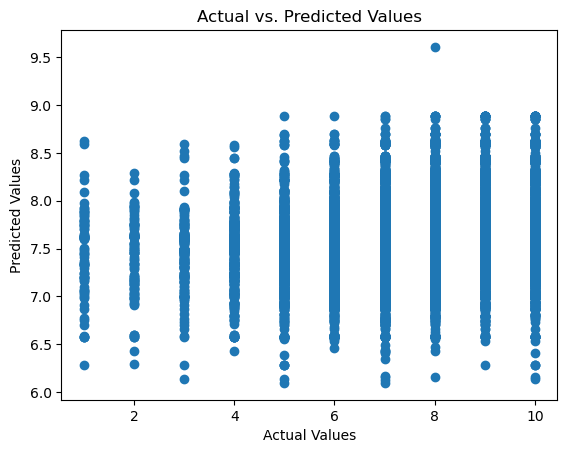

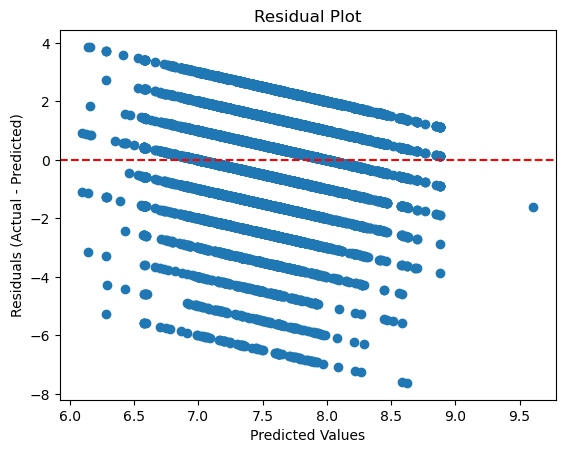

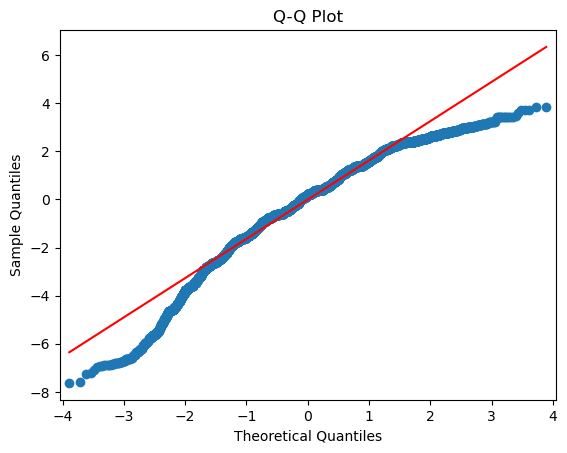

In [54]:
# Visualize predicted vs. actual values
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values')
plt.show()

# Residual Plot
residuals = y_test - y_pred
plt.scatter(y_pred, residuals)
plt.xlabel('Predicted Values')
plt.ylabel('Residuals (Actual - Predicted)')
plt.axhline(y=0, color='r', linestyle='--')
plt.title('Residual Plot')
plt.show()

# Q-Q Plot (Quantile-Quantile Plot) for normality check
import statsmodels.api as sm
qqplot = sm.qqplot(residuals, line='s')
plt.title('Q-Q Plot')
plt.show()